In [6]:
import numpy as np
import keras
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import matplotlib.pyplot as plt

from keras.layers import Flatten,Conv2D,MaxPool2D,Dense
from keras import Sequential

In [7]:
data_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=45,
    validation_split=0.05,
    shear_range=10
)

In [8]:
train_generator = data_gen.flow_from_directory("./yawn/train/",shuffle=True,subset='training',target_size=(100,100),batch_size=64)
valid_generator = data_gen.flow_from_directory("./yawn/train/",shuffle=True,subset='validation',target_size=(100,100))
test_generator = data_gen.flow_from_directory("./yawn/test/",target_size=(100,100),batch_size=215)

Found 1173 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


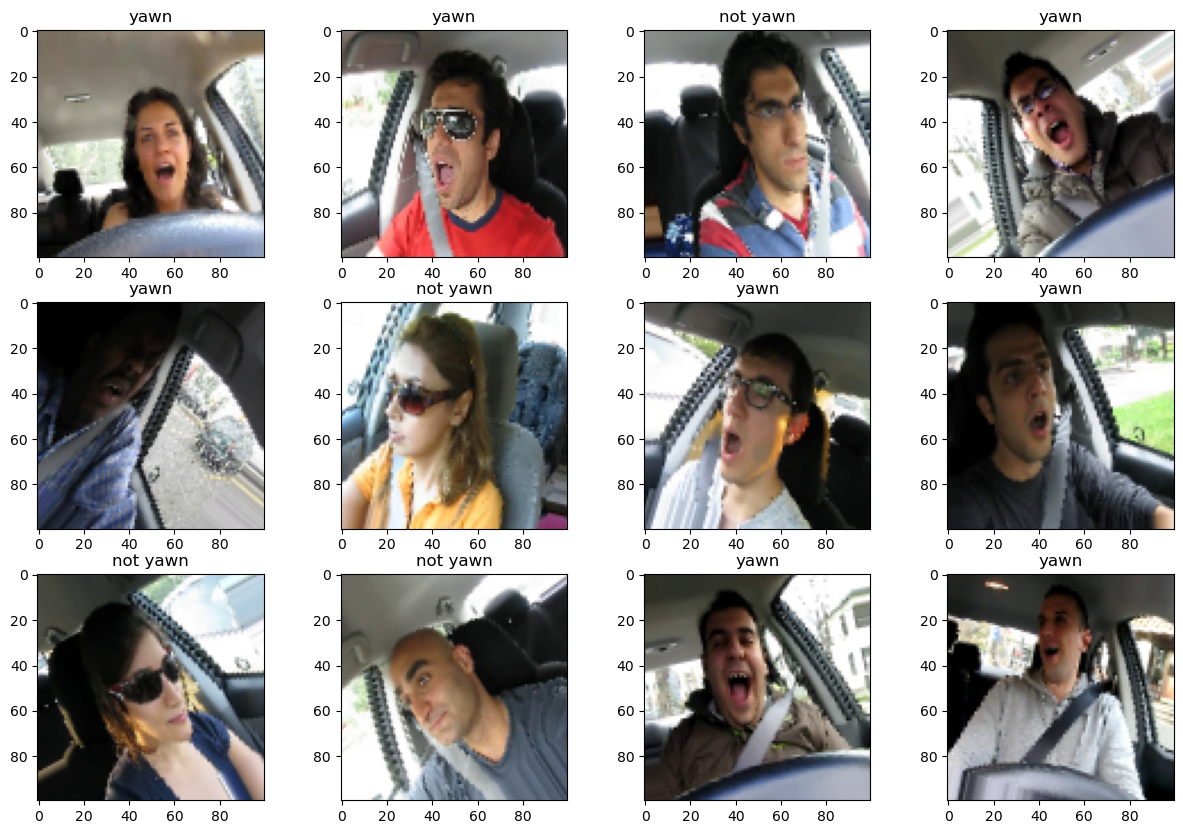

In [27]:
fig, ax = plt.subplots(3,4,figsize=(15,10))
axf = ax.flatten()
xf,yf = train_generator.__getitem__(0)
classes=['not yawn','yawn']
for i in range(12):
    axf[i].imshow(xf[i+10])
    axf[i].set_title(classes[yf[i+10].argmax()])

In [29]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=500,activation="relu"))
model.add(Dense(units=200,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 128)      

In [31]:
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(),metrics=['acc'])

In [32]:
history = model.fit(train_generator,epochs=30,validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 34s 2s/step - loss: 0.6980 - acc: 0.5371 - val_loss: 0.6505 - val_acc: 0.5667
Epoch 2/30
19/19 [==============================] - 112s 3s/step - loss: 0.6677 - acc: 0.6164 - val_loss: 0.7147 - val_acc: 0.4833
Epoch 3/30
19/19 [==============================] - 33s 2s/step - loss: 0.6345 - acc: 0.6343 - val_loss: 0.6398 - val_acc: 0.5167
Epoch 4/30
19/19 [==============================] - 40s 2s/step - loss: 0.5988 - acc: 0.6471 - val_loss: 0.6425 - val_acc: 0.5333
Epoch 5/30
19/19 [==============================] - 43s 2s/step - loss: 0.5921 - acc: 0.6488 - val_loss: 0.6333 - val_acc: 0.7000
Epoch 6/30
19/19 [==============================] - 29s 1s/step - loss: 0.5914 - acc: 0.6658 - val_loss: 0.5815 - val_acc: 0.5833
Epoch 7/30
19/19 [==============================] - 31s 2s/step - loss: 0.5977 - acc: 0.6394 - val_loss: 0.5984 - val_acc: 0.6500
Epoch 8/30
19/19 [==============================] - 31s 2s/step - loss: 0.5776 - acc: 0.6

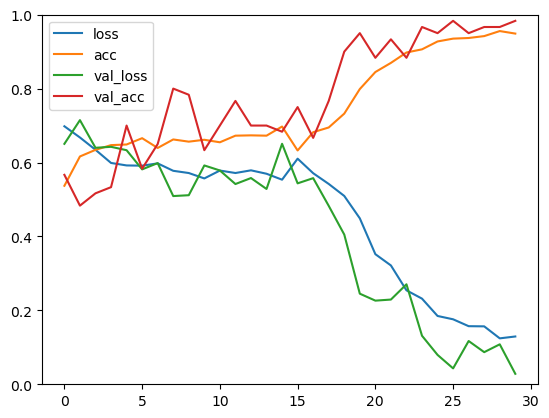

In [33]:
plt.plot(pd.DataFrame(history.history),label=history.history.keys())
plt.ylim((0,1))
plt.legend()

In [34]:
model.evaluate(test_generator)

7/7 [==============================] - 4s 357ms/step - loss: 0.1766 - acc: 0.9395


[0.1766156405210495, 0.9395349025726318]

In [25]:
model.save("./models/yawn.h5")

In [2]:
model = keras.models.load_model("./models/yawn.h5")

2023-05-28 20:22:03.891972: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-28 20:22:03.892021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-05-28 20:22:03.892497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2023-05-28 20:21:59.720797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 20:21:59.974158: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 20:21:59.979922: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-28 20:21:59.979950: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [9]:
X_test,y_test = test_generator.__getitem__(0)

In [10]:
classes = ['not yawn','yawn']

7/7 [==============================] - 4s 309ms/step


7/7 [==============================] - 2s 285ms/step


Text(50.722222222222214, 0.5, 'y_true')

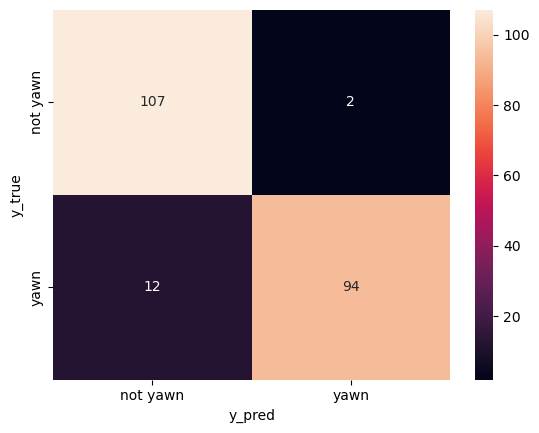

In [14]:
cf_matrix = confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
sns.heatmap(cf_matrix, annot=True, xticklabels=classes,yticklabels=classes,fmt='')
plt.xlabel("y_pred")
plt.ylabel("y_true")

In [15]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [16]:
predictions = model.predict(X_test)

7/7 [==============================] - 3s 331ms/step


In [17]:
rscore = recall_score(y_test.argmax(axis=1),predictions.argmax(axis=1))
pscore = precision_score(y_test.argmax(axis=1),predictions.argmax(axis=1))
fscore = f1_score(y_test.argmax(axis=1),predictions.argmax(axis=1))

In [18]:
print("recall:",rscore)
print("precision:",pscore)
print("F score:",fscore)

recall: 0.8867924528301887
precision: 0.9791666666666666
F score: 0.9306930693069307


In [10]:
from PIL import Image

In [17]:
img = Image.open("./Screenshot from 2023-05-28 20-21-36.png").resize((100,100))
image = np.array(img)[:,:,:3]

In [20]:
image = image/255.

In [21]:
model.predict(np.asarray([image]))

1/1 [==============================] - 0s 222ms/step


array([[0.08213718, 0.91786283]], dtype=float32)

In [22]:
print(image)

[[[0.39215686 0.38039216 0.38039216]
  [0.39607843 0.38039216 0.38823529]
  [0.38431373 0.37254902 0.38823529]
  ...
  [0.08627451 0.09019608 0.09803922]
  [0.08235294 0.10980392 0.10588235]
  [0.05490196 0.09411765 0.07843137]]

 [[0.37254902 0.37647059 0.37254902]
  [0.38039216 0.38039216 0.39215686]
  [0.38039216 0.37647059 0.39607843]
  ...
  [0.07058824 0.07843137 0.09803922]
  [0.0745098  0.10196078 0.10980392]
  [0.05882353 0.09803922 0.09803922]]

 [[0.35686275 0.38431373 0.36862745]
  [0.37254902 0.38039216 0.38823529]
  [0.36470588 0.36470588 0.38039216]
  ...
  [0.03529412 0.06666667 0.07058824]
  [0.06666667 0.09411765 0.10196078]
  [0.05882353 0.08627451 0.09411765]]

 ...

 [[0.71764706 0.70980392 0.7372549 ]
  [0.71764706 0.70196078 0.7372549 ]
  [0.70980392 0.69803922 0.73333333]
  ...
  [0.05882353 0.08627451 0.08627451]
  [0.0745098  0.10196078 0.09411765]
  [0.09019608 0.11764706 0.10980392]]

 [[0.70588235 0.69803922 0.7254902 ]
  [0.70980392 0.70196078 0.73333333]
